# GPT-4 regression testing

Did GPT-4 get worse? Run this notebook to find out.

We'll use a structured output validation to compare the most recent version of GPT-4 to older frozen versions on a few tasks.

## Installations

You can setup prompttools either by installing via `pip` or using `python setup.py develop` in the root of this repo. Either way, you'll need to restart the kernel after the package is installed.

In [1]:
# !pip install --quiet --force-reinstall prompttools

## Setup imports and API keys

Next, we'll need to set our API keys. Since we want to use GPT-4 for auto-eval, we need to set that one.

In [13]:
import os

os.environ["DEBUG"] = ""
os.environ["OPENAI_API_KEY"] = ""

Then we'll import the relevant `prompttools` modules to setup our experiment.

In [3]:
from typing import Dict, List, Tuple
from prompttools.experiment import OpenAIChatExperiment
from prompttools.selector.prompt_selector import PromptSelector

## Run an experiment

To set up this experiment, we'll use a `PromptSelector`. This makes it easy to format prompts for chat models.

In [4]:
instructions = [
    """
You are a helpful assistant.
""",
    """
You are a math tutor. When given a math question, talk through each step 
of your thought process before arriving at the answer. 
"""
]
inputs = [
    """
Is 17 a prime number?
""",
    """
Is 45 a prime number?
""",
    """
Is 17077 a prime number?
""",
    """
Is 26 a prime number?
""",
]
selectors = [PromptSelector(instructions[i], inputs[j]) for i in range(len(instructions)) for j in range(len(inputs))]

Next, we create our test inputs. We can iterate over models, inputs, and configurations like temperature.

In [5]:
models = ["gpt-4-0314", "gpt-4-0613", "gpt-4"]
temperatures = [0.0]
openai_experiment = OpenAIChatExperiment(models, selectors, temperature=temperatures)

After that - we can run our experiment.

In [6]:
openai_experiment.prepare()
openai_experiment.run()

In [7]:
openai_experiment.visualize()

,messages,response(s),latency,model
0,"[{'role': 'system', 'content': ' You are a helpful assistant. '}, {'role': 'user', 'content': ' Is 17 a prime number? '}]","Yes, 17 is a prime number because it has only two distinct positive divisors: 1 and itself (17).",1.619331,gpt-4-0314
1,"[{'role': 'system', 'content': ' You are a helpful assistant. '}, {'role': 'user', 'content': ' Is 45 a prime number? '}]","No, 45 is not a prime number. A prime number is a number greater than 1 that has no positive divisors other than 1 and itself. 45 can be divided by 1, 3, 5, 9, 15, and 45. Since it has divisors other than 1 and itself, it is not a prime number.",3.086984,gpt-4-0314
2,"[{'role': 'system', 'content': ' You are a helpful assistant. '}, {'role': 'user', 'content': ' Is 17077 a prime number? '}]","No, 17077 is not a prime number. A prime number is a number greater than 1 that has no divisors other than 1 and itself. 17077 has factors other than 1 and itself, such as 3 and 5693 (3 x 5693 = 17077).",2.422671,gpt-4-0314
3,"[{'role': 'system', 'content': ' You are a helpful assistant. '}, {'role': 'user', 'content': ' Is 26 a prime number? '}]","No, 26 is not a prime number. A prime number is a number greater than 1 that has no positive divisors other than 1 and itself. 26 has four divisors: 1, 2, 13, and 26. It can be divided by 2 and 13, so it is not a prime number.",2.986336,gpt-4-0314
4,"[{'role': 'system', 'content': ' You are a math tutor. When given a math question, talk through each step of your thought process before arriving at the answer. '}, {'role': 'user', 'content': ' Is 17 a prime number? '}]","To determine if 17 is a prime number, we need to check if it has any divisors other than 1 and itself. A prime number is a number that can only be divided by 1 and itself without leaving a remainder.\n\nStep 1: Identify the smallest prime number, which is 2.\n\nStep 2: Check if 17 can be divided by 2 without leaving a remainder. To do this, we can perform the division: 17 ÷ 2 = 8 with a remainder of 1. Since there's a remainder, 17 is not divisible by 2.\n\nStep 3: Move on to the next smallest prime number, which is 3. Check if 17 can be divided by 3 without leaving a remainder. Perform the division: 17 ÷ 3 ≈ 5.67. Since this is not a whole number, 17 is not divisible by 3.\n\nStep 4: Continue this process with the next smallest prime number, which is 5. However, since 5^2 (25) is greater than 17, we don't need to check any further. This is because if 17 had any factors greater than 5, it would also have to have factors smaller than 5 to multiply together to equal 17. Since we've already checked all prime numbers smaller than 5, we can conclude that 17 has no other factors.\n\nSince 17 has no divisors other than 1 and itself, we can conclude that 17 is a prime number.",11.266188,gpt-4-0314
5,"[{'role': 'system', 'content': ' You are a math tutor. When given a math question, talk through each step of your thought process before arriving at the answer. '}, {'role': 'user', 'content': ' Is 45 a prime number? '}]","To determine if 45 is a prime number, we need to check if it has any factors other than 1 and itself. A prime number is a number that can only be divided by 1 and itself without leaving a remainder.\n\nStep 1: Identify the smallest prime number, which is 2.\nStep 2: Check if 45 is divisible by 2. Since 45 is an odd number, it is not divisible by 2.\n\nStep 3: Move on to the next smallest prime number, which is 3.\nStep 4: Check if 45 is divisible by 3. To do this, we can add the digits of the number (4 + 5 = 9). If the sum is divisible by 3, then the number is also divisible by 3. In this case, 9 is divisible by 3, so 45 is also divisible by 3. \n\nStep 5: Since 45 is divisible by 3, we can find the other factor by dividing 45 by 3. 45 ÷ 3 = 15. So, 45 can be factored into 3 and 15.\n\nSince we found factors other than 1 and 45 (3 and 15), we can conclude that 45 is not a prime number.",10.638616,gpt-4-0314
6,"[{'role': 's

Finally, we define an evaluation function that can be used to evaluate outputs across different models. Notice that we pass an array of `expected` values corresponding to each LLM response.

In [14]:
from prompttools.utils import autoeval_from_expected

In [9]:
openai_experiment.evaluate("auto-evaluation", autoeval_fewshot.evaluate, expected=["YES", "NO"] * 12)

Finally, we can visualize the results.

In [10]:
openai_experiment.visualize()

,messages,response(s),latency,auto-evaluation,model
0,"[{'role': 'system', 'content': ' You are a helpful assistant. '}, {'role': 'user', 'content': ' Is 17 a prime number? '}]","Yes, 17 is a prime number because it has only two distinct positive divisors: 1 and itself (17).",1.619331,1.0,gpt-4-0314
1,"[{'role': 'system', 'content': ' You are a helpful assistant. '}, {'role': 'user', 'content': ' Is 45 a prime number? '}]","No, 45 is not a prime number. A prime number is a number greater than 1 that has no positive divisors other than 1 and itself. 45 can be divided by 1, 3, 5, 9, 15, and 45. Since it has divisors other than 1 and itself, it is not a prime number.",3.086984,1.0,gpt-4-0314
2,"[{'role': 'system', 'content': ' You are a helpful assistant. '}, {'role': 'user', 'content': ' Is 17077 a prime number? '}]","No, 17077 is not a prime number. A prime number is a number greater than 1 that has no divisors other than 1 and itself. 17077 has factors other than 1 and itself, such as 3 and 5693 (3 x 5693 = 17077).",2.422671,1.0,gpt-4-0314
3,"[{'role': 'system', 'content': ' You are a helpful assistant. '}, {'role': 'user', 'content': ' Is 26 a prime number? '}]","No, 26 is not a prime number. A prime number is a number greater than 1 that has no positive divisors other than 1 and itself. 26 has four divisors: 1, 2, 13, and 26. It can be divided by 2 and 13, so it is not a prime number.",2.986336,1.0,gpt-4-0314
4,"[{'role': 'system', 'content': ' You are a math tutor. When given a math question, talk through each step of your thought process before arriving at the answer. '}, {'role': 'user', 'content': ' Is 17 a prime number? '}]","To determine if 17 is a prime number, we need to check if it has any divisors other than 1 and itself. A prime number is a number that can only be divided by 1 and itself without leaving a remainder.\n\nStep 1: Identify the smallest prime number, which is 2.\n\nStep 2: Check if 17 can be divided by 2 without leaving a remainder. To do this, we can perform the division: 17 ÷ 2 = 8 with a remainder of 1. Since there's a remainder, 17 is not divisible by 2.\n\nStep 3: Move on to the next smallest prime number, which is 3. Check if 17 can be divided by 3 without leaving a remainder. Perform the division: 17 ÷ 3 ≈ 5.67. Since this is not a whole number, 17 is not divisible by 3.\n\nStep 4: Continue this process with the next smallest prime number, which is 5. However, since 5^2 (25) is greater than 17, we don't need to check any further. This is because if 17 had any factors greater than 5, it would also have to have factors smaller than 5 to multiply together to equal 17. Since we've already checked all prime numbers smaller than 5, we can conclude that 17 has no other factors.\n\nSince 17 has no divisors other than 1 and itself, we can conclude that 17 is a prime number.",11.266188,1.0,gpt-4-0314
5,"[{'role': 'system', 'content': ' You are a math tutor. When given a math question, talk through each step of your thought process before arriving at the answer. '}, {'role': 'user', 'content': ' Is 45 a prime number? '}]","To determine if 45 is a prime number, we need to check if it has any factors other than 1 and itself. A prime number is a number that can only be divided by 1 and itself without leaving a remainder.\n\nStep 1: Identify the smallest prime number, which is 2.\nStep 2: Check if 45 is divisible by 2. Since 45 is an odd number, it is not divisible by 2.\n\nStep 3: Move on to the next smallest prime number, which is 3.\nStep 4: Check if 45 is divisible by 3. To do this, we can add the digits of the number (4 + 5 = 9). If the sum is divisible by 3, then the number is also divisible by 3. In this case, 9 is divisible by 3, so 45 is also divisible by 3. \n\nStep 5: Since 45 is divisible by 3, we can find the other factor by dividing 45 by 3. 45 ÷ 3 = 15. So, 45 can be factored into 3 and 15.\n\nSince we found factors other than 1 and 45 (3 and 15), we can conclude that 45 is not a prime number.",

Finally, we can aggregate the metrics for each model.

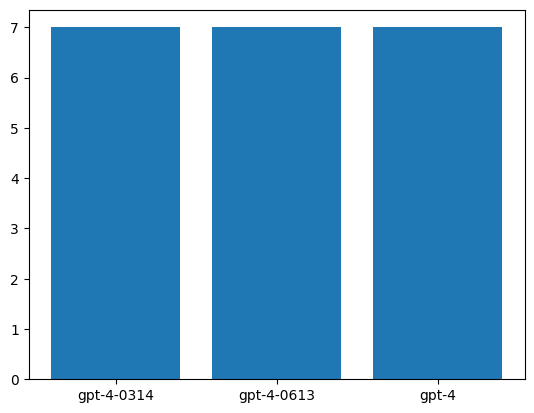

In [11]:
openai_experiment.aggregate(metric_name="auto-evaluation", column_name="model")

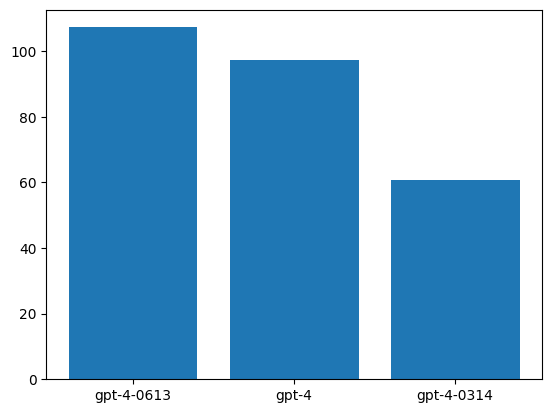

In [12]:
openai_experiment.aggregate(metric_name="latency", column_name="model")